## Лабораторная работа № 3.3.4

### Тема: Эффект Холла в полупроводниках

**Цель работы**: измерение подвижности и концетрации носителей в полупроводниках.

**В работе используются**: электромагнит с источником питания GPR, батарейка $1.5\ В$, амперметр, реостат, цировой вольтметр $В7-78/1$, милливеберметр, образцы легированного германия.

**Описание работы:**

https://mipt.ru/education/chair/physics/S_III/lab_el/3.3.4(4-11%D0%91-2)%D0%AD%D1%84%D1%84.%D0%A5%D0%BE%D0%BB%D0%BB%D0%B0%20%D0%B2%20%D0%BF%D0%BE%D0%BB%D1%83%D0%BF%D1%80._2014-VIII.pdf

**Рабочие формулы:**

**1)** $\mathscr{E} = U_{34} \pm U_0$ - ЭДС Холла при втором методе исключения влияния омического падения напряжения.

**2)** $$\sigma = \frac{IL_{35}}{U_{35}al},$$ где $I\ -\ $ ток в образце, $U_{35}\ -\ $ напряжение между контактами 3 и 5 в отсутствие магнитного поля, $\sigma\ -\ $ проводимость материала образца, $L_{35}\ -\ $ расстояние между контактами 3 и 5, $a$ и $l$ - толщина и ширина образца соответственно.

**3)** $b = \frac{\sigma}{en}$, где $b$ - подвижность носителей заряда.

**Схема установки:**
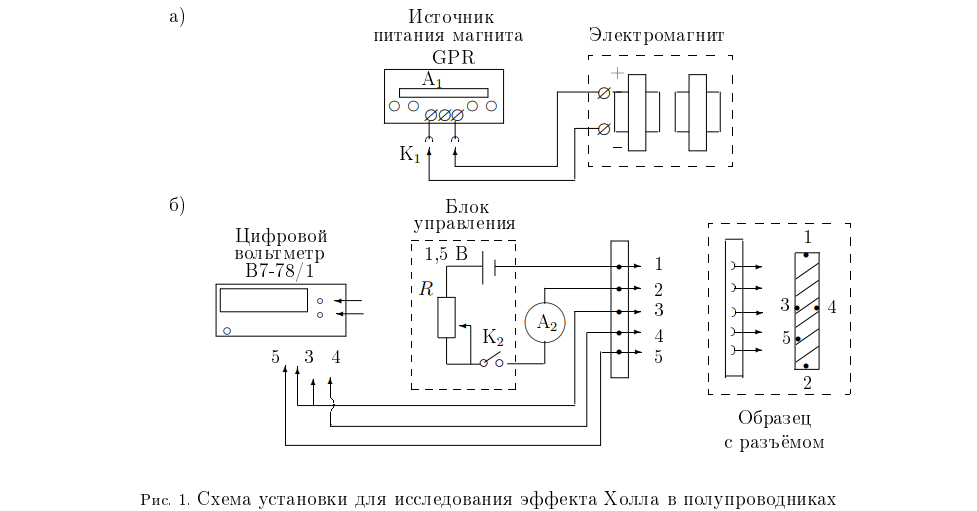

In [2]:
import pandas as pd

**Ход работы:**

**1) Подготовка.**

Определим максимальное значение тока $I_{M, max}$ через электромагнит.

In [3]:
I_M_max = 1.43 # А
U_max = 115.3 # В

In [4]:
# Some sample parameters:
a = 2.2 / 1000 # м
L_35 = 3.0 / 1000 # м
l = 2.5 / 1000 # м
sigma_param = 0.1 / 1000

**2) Градуировка электромагнита.**

Проведём измерение магнитной индукции для $6-8$ значений тока (вплоть до $I_{M, max}$).

           0      1       2      3       4       5       6        7
I, А     0.0   0.09    0.33    0.5    0.68    0.75    1.15     1.41
B, мТл  16.7  98.00  329.60  503.1  636.30  706.90  929.80  1015.90
*Ввиду малых значений абсолютной погрешности относительно размеров маркера на графике они не отображены.


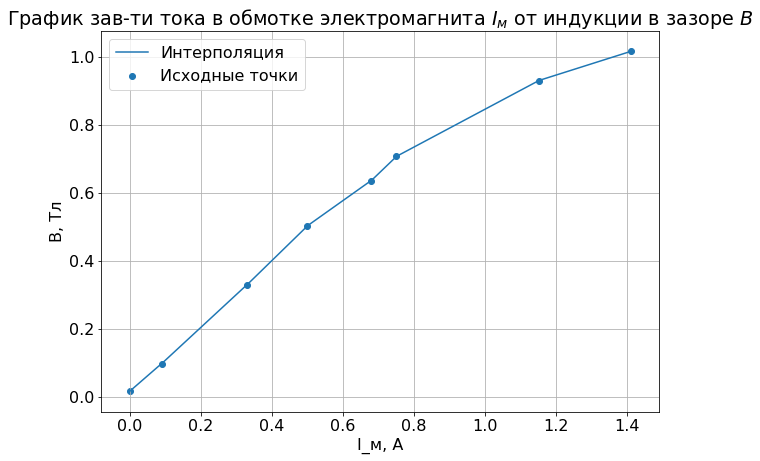

In [35]:
I = [ 0.0, 0.09, 0.33, 0.50, 0.68, 0.75, 1.15, 1.41 ] # А
B = [ 16.7, 98.0, 329.6, 503.1, 636.3, 706.9, 929.8, 1015.9 ] # мТл

sigma_instr_I = 0.01 # А
sigma_instr_B = 0.1 # мТл - весьма маленькое по сравнению с I

table_1 = pd.DataFrame({
    "I, А" : I,
    "B, мТл" : B
})

print(table_1.T)




# Print the plot of B = f(I)
# Also calculate interpolation B_interp to use later

def mnk_method(val_x, val_y):
    '''
    Принимает Series точек по x и Series по y (равны)
    Возвращает list из b, a, sigma_b, sigma_a
    '''
    b = ( (val_x * val_y).mean() - val_x.mean() * val_y.mean() )/( (val_x**2).mean() - val_x.mean()**2 )
    a = val_y.mean() - b * val_x.mean()
    sigma_b = 1 / val_x.size * ( ( (val_y**2).mean() - val_y.mean()**2 ) / \
                           ( (val_x**2).mean() - val_x.mean()**2 ) - b**2 )**(1/2)
    sigma_a = sigma_b * ( (val_x**2).mean() - val_x.mean()**2 )**(1/2)
    
    return {'b' : b, 'a' : a, 'sigma_b' : sigma_b, 'sigma_a' : sigma_a}

res_val = mnk_method(table_1["I, А"], table_1["B, мТл"] / 1000)
val_x = table_1["I, А"]
val_y = table_1["B, мТл"] / 1000






import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16
plt.figure(figsize=(10,7))

plt.title(r"График зав-ти тока в обмотке электромагнита $I_м$ от индукции в зазоре $B$")
plt.ylabel("B, Тл")
plt.xlabel(r"I_м, А")

from scipy import interpolate
x = np.linspace(val_x.min(), val_x.max(), 10000)
interp = interpolate.interp1d(val_x, val_y)
ynew = interp(x)   # use interpolation function returned by `interp1d`
plt.plot(x,ynew, label="Интерполяция")

plt.scatter(val_x, val_y, label='Исходные точки')


# plt.errorbar(x2, y2, yerr=sigma_instr_B / 1000, xerr=sigma_instr_I, fmt='.', label='Погрешность') 

print("*Ввиду малых значений абсолютной погрешности относительно размеров маркера на графике они не отображены.")


plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=0.5)
plt.legend()

**3) Измерение ЭДС Холла.**

Проведём измерение зависимости $U_{34} = f(I_M)$. Также определим знак носителей.

In [11]:
U_0 = [ 0.007, 0.013, 0.018, 0.024, 0.030, 0.037 ] # мВ

U_34_0 = [ 0.016, 0.026, 0.034, 0.043, 0.045, 0.048, 0.049 ] # I = 24 дел = 24 * 10^-2 мА, [U] = мВ
I_M_0 = [ 0.25, 0.49, 0.73, 0.99, 1.12, 1.26, 1.40 ]
U_34_1 = [ 0.025, 0.041, 0.054, 0.061, 0.067, 0.074, 0.079 ] # I = 37 дел
I_M_1 = [ 0.21, 0.48, 0.71, 0.84, 0.99, 1.20, 1.39 ]
U_34_2 = [ 0.031, 0.060, 0.073, 0.086, 0.097, 0.105, 0.111 ] # I = 52 дел
I_M_2 = [ 0.17, 0.49, 0.66, 0.84, 1.01, 1.20, 1.38 ]
U_34_3 = [ 0.045, 0.075, 0.094, 0.112, 0.125, 0.136, 0.143 ] # I = 67 дел
I_M_3 = [ 0.20, 0.47, 0.65, 0.84, 1.01, 1.20, 1.37 ]
U_34_4 = [ 0.055, 0.090, 0.115, 0.134, 0.153, 0.166, 0.175 ] # I = 82 дел
I_M_4 = [ 0.20, 0.46, 0.65, 0.82, 1.01, 1.19, 1.36 ]
U_34_5 = [ 0.068, 0.109, 0.139, 0.165, 0.184, 0.200, 0.210 ] # I = 98 дел
I_M_5 = [ 0.20, 0.46, 0.66, 0.83, 1.01, 1.20, 1.35 ]

I_list = pd.Series([24, 37, 52, 67, 82, 98]) / 10**5


# Это значения индукции, вычисленные по каждому из токов через электромагнит
# Каждый список соответствует своей серии измерений
B_full = [ pd.Series(interp(I_M_0)), # здесь интерполяция сразу в Тл
          pd.Series(interp(I_M_1)), 
          pd.Series(interp(I_M_2)), 
          pd.Series(interp(I_M_3)), 
          pd.Series(interp(I_M_4)), 
          pd.Series(interp(I_M_5)) ]

# Это соответствующие им напряжения на вольтметре в В
# При вычислениях delta постоянной Холла просто убрал U_0[i] и посчитал ещё раз R_h
# Разность значений должна быть этой delta
U_full = [ (pd.Series(U_34_0) - U_0[0]) / 10**3,
            (pd.Series(U_34_1) - U_0[1]) / 10**3, 
            (pd.Series(U_34_2) - U_0[2]) / 10**3,
            (pd.Series(U_34_3) - U_0[3]) / 10**3,
            (pd.Series(U_34_4) - U_0[4]) / 10**3, 
            (pd.Series(U_34_5) - U_0[5]) / 10**3 ]

# Далее при повороте на 180 градусов
U_0_reverse = 0.032
U_34_6 = [ 0.001, -0.039, -0.069, -0.092, -0.113, -0.130, -0.141 ]
I_M_6 = [ 0.20, 0.46, 0.66, 0.83, 1.00, 1.20, 1.36 ]


# 3) Без магнитного поля 0.005
# С магнитным полем -0.002


*Ввиду малых значений абсолютной погрешности относительно размеров маркера на графике они не отображены.


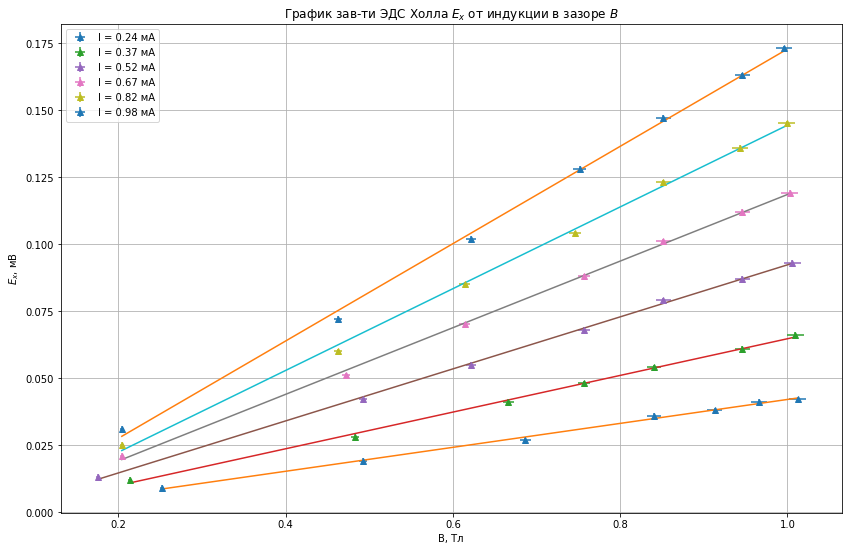

In [12]:
# Print the plot of E_h = f(B)
# Also calculate K - line slope
K_list = []
K_sigma = 1000

plt.figure(figsize=(14, 9))

plt.title("График зав-ти ЭДС Холла $E_х$ от индукции в зазоре $B$")
plt.ylabel("$E_x$, мВ")
plt.xlabel("B, Тл")

for i in range(len(U_full)) :
    res_val = mnk_method(B_full[i], U_full[i] * 1000)
    K_list.append(res_val['b'])
    if K_sigma > res_val['sigma_b']:
        K_sigma = res_val['sigma_b']
    
    val_x = B_full[i]
    val_y = U_full[i]  * 1000
    
    plt.errorbar(val_x, val_y,yerr=0.001, xerr=val_x*0.01, fmt='^', label='I = ' + str(round(I_list[i] * 1000, 3)) + ' мА')
#     plt.plot(val_x, val_y, fmt='.')
    
    x = np.linspace(val_x.min(), val_x.max(), 200)
    y = res_val['b'] * x + res_val['a']
    plt.plot(x, y)


    
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=0.5)
plt.legend()

print("*Ввиду малых значений абсолютной погрешности относительно размеров маркера на графике они не отображены.")

In [8]:
# Print table K = f(I)

table_2 = pd.DataFrame({
    "I, мА" : pd.Series(I_list) * 1000,
    "K, мВ/Тл" : K_list
})

print(table_2.T)
print(" Погрешность I - 0.01 мА.\n", "Погрешность K - {:.4f} мВ/Тл.".format(K_sigma))

                 0         1         2         3         4         5
I, мА     0.240000  0.370000  0.520000  0.670000  0.820000  0.980000
K, мВ/Тл  0.044672  0.068433  0.097072  0.124287  0.152547  0.181604
 Погрешность I - 0.01 мА.
 Погрешность K - 0.0004 мВ/Тл.


Постоянная Холла: 0.0004079
Абс. погрешность:  4.375903623371193e-07
*Ввиду малых значений абсолютной погрешности относительно размеров маркера на графике они не отображены.


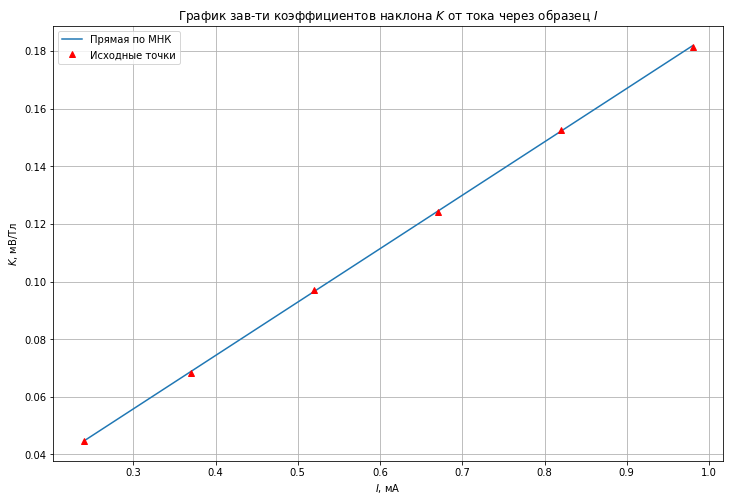

In [9]:
# Print plot K = f(I)
# Also calculate R_h - Hall constant

res_val = mnk_method(table_2["I, мА"], table_2["K, мВ/Тл"])
R_h = res_val["b"] * a
sigma_R_h = res_val["sigma_b"] * a

val_x = table_2["I, мА"]
val_y = table_2["K, мВ/Тл"]


plt.figure(figsize=(12, 8))

plt.title("График зав-ти коэффициентов наклона $K$ от тока через образец $I$")
plt.ylabel("$K$, мВ/Тл")
plt.xlabel("$I$, мА")

x = np.linspace(val_x.min(), val_x.max(), 100)
y = res_val['b'] * x + res_val['a']
plt.plot(x,y, label="Прямая по МНК")

x2 = val_x
y2 = val_y
plt.plot(x2, y2, 'r^', label='Исходные точки')

# plt.errorbar(x2, y2, yerr=0, xerr=0, fmt='.', label='Погрешность') 

plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=0.5)
plt.legend()


print("Постоянная Холла:", "{:0.7f}".format(R_h))
print("Абс. погрешность: ", sigma_R_h)
print("*Ввиду малых значений абсолютной погрешности относительно размеров маркера на графике они не отображены.")

Измеренное значение постоянной Холла: $R_х = (4.079 \pm 0.004) \times 10^{-4}\ м^3/Кл$

Носители заряда - электроны.

**4) Определение удельной проводимости и подвижности.**

In [10]:
U_35 = 1.745 / 1000 # В
I = 1 # мА +- 0.01 мА
I /= 1000 # А
sigma_I = 0.01 / 1000

# And error should be calculated.
sigma = I * L_35 / (U_35 * a * l)
sigma_sigma = sigma * ((sigma_I / I)**2 + (sigma_param / a)**2 + (sigma_param / L_35)**2 + (sigma_param / l)**2)**0.5
print("sigma = {:0.0f} ± {:0.0f} (Ом * м)^(-1)".format(round(sigma / 10) * 10, round(sigma_sigma / 10) * 10))

e = 1.6021 * 10**(-19)
n = 1 / (R_h * e)
sigma_n = n * sigma_R_h / R_h
print("n = {:0.3f} ± {:0.3f} м^(-3)".format(n / 10**22, sigma_n / 10**22), "× 10^22")

b = sigma * R_h * 10**4 # см^2/(В * с)
sigma_b = b * ((sigma_sigma/sigma)**2 + (sigma_R_h / R_h))**0.5
print("b = {:0.0f} ± {:0.0f} см^2/(В * с)".format(round(b/100)*100, round(sigma_b / 100)*100))

sigma = 310 ± 20 (Ом * м)^(-1)
n = 1.530 ± 0.002 м^(-3) × 10^22
b = 1300 ± 100 см^2/(В * с)


| $R_X\pm\Delta R_X, 10^{-4} м^3/Кл$ | $Знак\ носит.$ | $n\pm\Delta n, 10^{22} м^{-3}$ | $\sigma\pm\Delta\sigma, {(Ом\cdot м)}^{-1}$ | $b\pm\Delta b, см^2/(В\cdot с)$ |
| -------------------- | --- | --- | --- | --- |
| $R_х = 4.079 \pm 0.004$ | $Отрицательный$ | $1.530\pm 0.002$ | $310\pm 20$ | $1300\pm 100$ |
| <img width=100/> | <img width=100/> | | | |